In [2]:
using PyPlot #Libreria para realizar gráficas
using RungeKutta

# Oscilador paramétrico forzado con 1 1/2 grados de libertad

## Introducción

### Caso del péndulo simple

La ecuación de movimiento del péndulo simple es: 

 \begin{equation} \ddot{θ}=-\left(\frac{g}{l}\right)sin(θ) \end{equation} 
 
cuya solución analítica es:

 \begin{equation} θ(t)=θ_0 cos\left(\sqrt{\frac{g}{l}}t\right)  \end{equation} 

donde $\omega = \frac{2 \pi}{T}=\sqrt{\frac{g}{l}}$

Podemos obtener la solución numérica con el método de Runge-Kutta 4, el cual, resuelve ecuaciones diferenciales de primer orden, es decir, de la forma: 

 \begin{equation} \frac{\partial \vec{x}}{\partial t} =f(t,\vec{x}) \end{equation} 
 
Por lo tanto, debemos convertir la ecuación de movimiento del péndulo simple en un sistema de dos ecuaciones de primer orden como se muestra a continuación:

\begin{equation}
  \begin{cases} \frac{\partial \vec{θ}}{\partial t}=\vec{y}
             \\ 
             \\ \frac{\partial \vec{y}}{\partial t} = -\left(\frac{g}{l}\right)sin(\vec{θ})
  \end{cases}
\end{equation} 





In [3]:
function pendulo_simple(l,angulo)


    function f1(t, θ)
        y=θ[2]
        return y  
    end

    function f2(t, θ)
        g = 9.81
        dy=-(g/l)*sin(θ[1])
        return dy
    end
    # θ[1] sería el ángulo y θ[2], la velocidad (angular)

    θ0 = [angulo,0];#condiciones iniciales
    t0 = 0.;
    
    h = 0.0001;
    n = 100000;

    t,θ = rk4f([f1, f2], θ0, t0, h, n);

    
    subplot(311)

    axhline(color="red")
    title("Oscilaciones")
    xlabel("\$t\$")
    ylabel("\$θ\$")
    grid()
    plot(t', θ[1,:],label="\$θ = $angulo \$ ")
    #legend(loc="best")
    
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    subplot(212)
    axhline(0, color="red")
    title("Espacio fase")
    xlabel("\$θ\$")
    ylabel("\$dθ/dt\$")
    grid() 
    plot(θ[1,:], θ[2,:],label="\$θ = $angulo \$ ")

    show()
    
end    

pendulo_simple (generic function with 1 method)

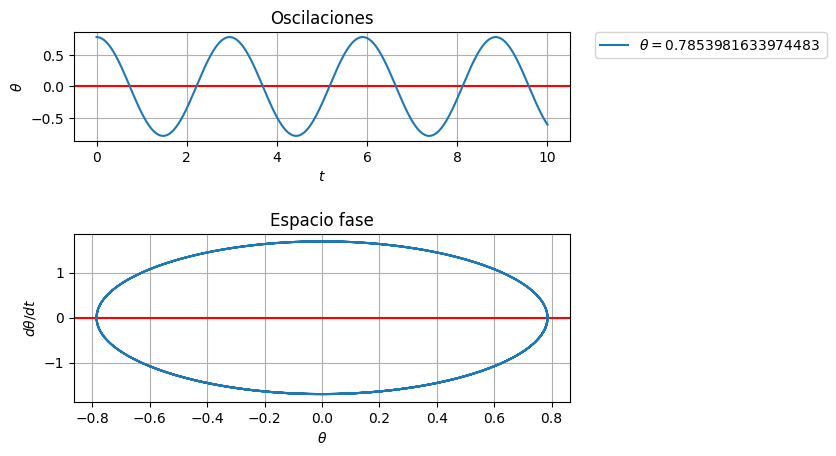

In [4]:
pendulo_simple(2.,pi/4)

<img src="https://i.imgur.com/Ol8PUur.png" title="Angulos1" width="250" height="200" align="center">

In [5]:
angulos=[pi/2,pi/3,pi/4,pi/6,0,11*pi/6,7*pi/4,5*pi/3,3*pi/2,4*pi/3,5*pi/4,7*pi/6,pi,5*pi/6,3*pi/4,2*pi/3];

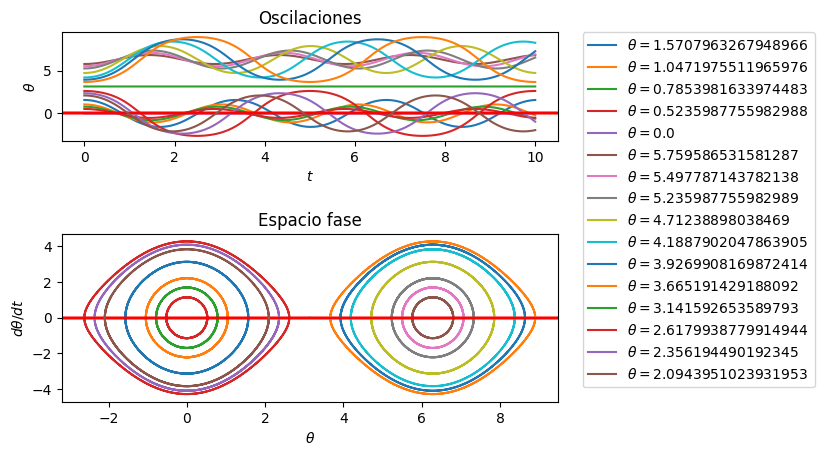

In [6]:
for i=1:length(angulos)
       pendulo_simple(2.,angulos[i])    
end    

### Péndulo invertido

Por otro lado, en el caso del péndulo invertido tenemos la siguiente ecuación de movimiento: 

\begin{equation} \ddot{θ}=\left(\frac{g}{l}\right)sin(θ) \end{equation} 

Convertir la ecuación de movimiento del péndulo invertido en un sistema de dos ecuaciones de primer orden:

\begin{equation}
  \begin{cases} \frac{\partial \vec{θ}}{\partial t}=\vec{y}
             \\ 
             \\ \frac{\partial \vec{y}}{\partial t} = \left(\frac{g}{l}\right)sin(\vec{θ})
  \end{cases}
\end{equation} 

In [7]:
function pendulo_invertido(l,angulo)

    
    function f1(t, θ)
        y=θ[2]
        return y  
    end

    function f2(t, θ)
        g = 9.81
       
        dy=(g/l)*sin(θ[1])
        return dy
    end
    # θ[1] sería el ángulo y θ[2], la velocidad (angular)

    θ0 = [angulo, 0];
    t0 = 0.;
    h = 0.0001;
    n = 100000;

    t,θ = rk4f([f1, f2], θ0, t0, h, n);

    
    subplot(311)

    axhline(color="red")
    title("Oscilaciones")
    xlabel("\$t\$")
    ylabel("\$θ\$")
    grid()
    plot(t', θ[1,:],label="\$θ = $angulo \$ ")
    #legend(loc="best")
    
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    subplot(212)
    axhline(0, color="red")
    title("Espacio fase")
    xlabel("\$θ\$")
    ylabel("\$dθ/dt\$")
    grid() 
    plot(θ[1,:], θ[2,:],label="\$θ = $angulo \$ ")

    show()
    
end    

pendulo_invertido (generic function with 1 method)

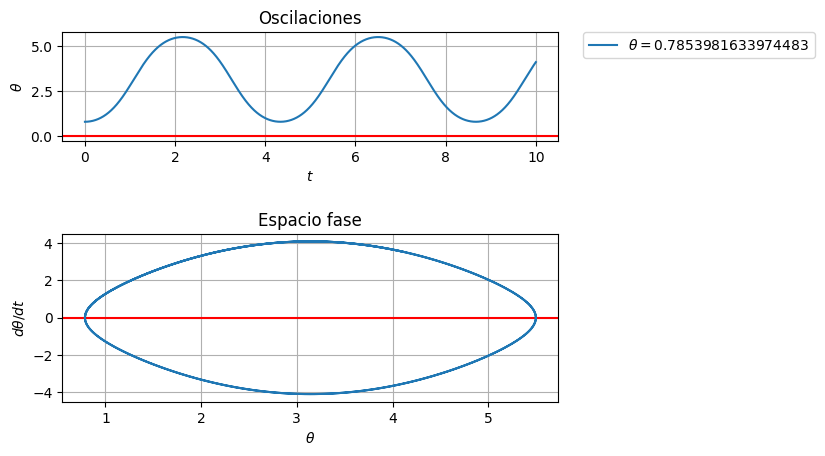

In [10]:
pendulo_invertido(2.,pi/4)

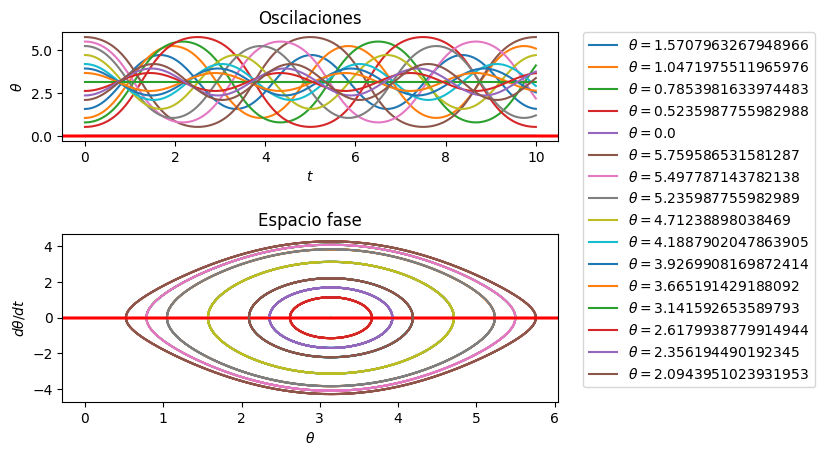

In [12]:
for i=1:length(angulos)
       pendulo_invertido(2.,angulos[i])  
end    

## Péndulo paramétrico

Ecuación de movimiento: 

 \begin{equation} \ddot{θ}=\left[α+βcos(t)\right]sin(θ) \end{equation} 
 
 donde $α=\sqrt{\frac{g}{l}}$ y $β$ es la amplitud del forzamiento.
 
Podemos obtener la solución numérica con el método de Runge-Kutta 4, el cual, resuelve ecuaciones diferenciales de primer orden, es decir, de la forma: 

 \begin{equation} \frac{\partial \vec{x}}{\partial t} =f(t,\vec{x}) \end{equation} 
 
 Por lo tanto, debemos convertir la ecuación de movimiento del péndulo en un sistema de dos ecuaciones de primer orden como se muestra a continuación:

\begin{equation}
  \begin{cases} \frac{\partial \vec{θ}}{\partial t}=\vec{y}
             \\ 
             \\ \frac{\partial \vec{y}}{\partial t} = \left[α+βcos(t)\right]sin(θ)
  \end{cases}
\end{equation} 
        

<img src="https://i.imgur.com/7BkWoR2.png" title="Angulos" width="250" height="200" align="center">


--------------

In [13]:
function espacio_fase(α,β)

function f1(t, θ)
    y=θ[2]
    return y  
end

function f2(t, θ)
    #g = 9.81
    #l = 1.
    #α=sqrt(g/l)
    
   # α=-2. #como en el pendulo simple

    #β=0.
    
    dy=(α+β*cos(t[1]))*sin(θ[1])
    return dy
    
end
    
# θ[1] sería el ángulo y θ[2], la velocidad (angular)

t0 = 0.;
h = 0.0001;
n = 100000;
    
θth = [[0*pi, 0],[pi/6, 0],[pi/4, 0],[pi/3, 0],[pi/2, 0],[2*pi/3, 0],[3*pi/4, 0],[5*pi/6, 0],[pi, 0],
    [7*pi/6, 0],[5*pi/4, 0],[4*pi/3, 0],[3*pi/2,0],[5*pi/3, 0],[7*pi/4, 0],[11*pi/6, 0],[2*pi, 0]];

gradiente_color=["#0000ff","#0044FF","#0088FF","#00CBFF","#00FFED","#00FFA9","#00FF65","#00FF21",
    "#22FF00","#65FF00","#AAFF00","#EEFF00","#FFCC00","#FF8800","#FF4300","#FF0000","#FF0022"];

#RANGO EN X
   # fig,ax = subplots()
   # ax[:set_xlim](-pi, pi)

for i=1:length(θth)

     t,θ = rk4f([f1, f2], θth[i], t0, h, n)
     plot(θ[1,:], θ[2,:],color=gradiente_color[i])   

end   

  axhline(0, color="red") 
title("Espacio fase \$(α,β) = ($α ,$β) \$ ")#Título de la gráfica
xlabel("\$θ\$") #Etiqueta para el eje X
ylabel("velocidad angular \$  dθ/dt\$")#Etiqueta para el eje Y

grid() #malla
show()
 
end

In [14]:
function oscilaciones(α,β)

function f1(t, θ)
    y=θ[2]
    return y  
end

function f2(t, θ)
    #g = 9.81
    #l = 1.
    #α=sqrt(g/l)
    
   # α=-2. #como en el pendulo simple

    #β=0.
    
    dy=(α+β*cos(t[1]))*sin(θ[1])
    return dy
    
end
    
# θ[1] sería el ángulo y θ[2], la velocidad (angular)

t0 = 0.;
h = 0.0001;
n = 100000;
    
θth = [[0*pi, 0],[pi/6, 0],[pi/4, 0],[pi/3, 0],[pi/2, 0],[2*pi/3, 0],[3*pi/4, 0],[5*pi/6, 0],[pi, 0],
    [7*pi/6, 0],[5*pi/4, 0],[4*pi/3, 0],[3*pi/2,0],[5*pi/3, 0],[7*pi/4, 0],[11*pi/6, 0],[2*pi, 0]];

gradiente_color=["#0000ff","#0044FF","#0088FF","#00CBFF","#00FFED","#00FFA9","#00FF65","#00FF21",
    "#22FF00","#65FF00","#AAFF00","#EEFF00","#FFCC00","#FF8800","#FF4300","#FF0000","#FF0022"];

#RANGO EN X
    #fig,ax = subplots()
    #ax[:set_xlim](-pi, pi)

for i=1:length(θth)

    
     t,θ = rk4f([f1, f2], θth[i], t0, h, n)
     plot(t', θ[1,:],color=gradiente_color[i])
    

end   

  axhline(0, color="red") 
title("Oscilaciones \$(α,β) = ($α ,$β) \$ ")#Título de la gráfica
xlabel("\$t\$") #Etiqueta para el eje X
ylabel("Amplitud")#Etiqueta para el eje Y

grid() #malla
show()
 
end

 \begin{equation} \ddot{θ}=\left[α+βcos(t)\right]sin(θ) \end{equation} 

Si β=0

\begin{equation}
  \begin{cases} α<0   & \text{Péndulo simple }
             \\ 
             \\ α>0   & \text{Péndulo invertido }
  \end{cases}
\end{equation} 

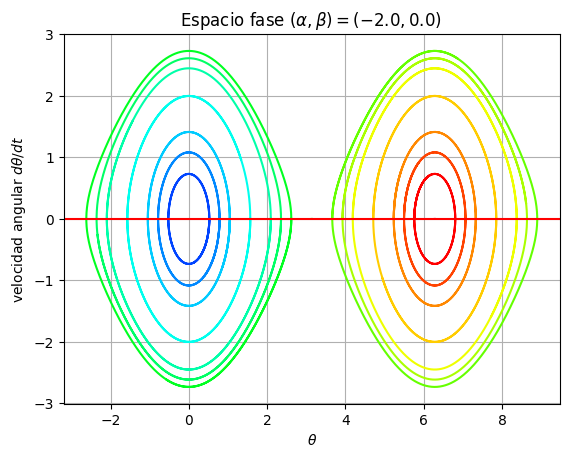

In [11]:
espacio_fase(-2.,0.)

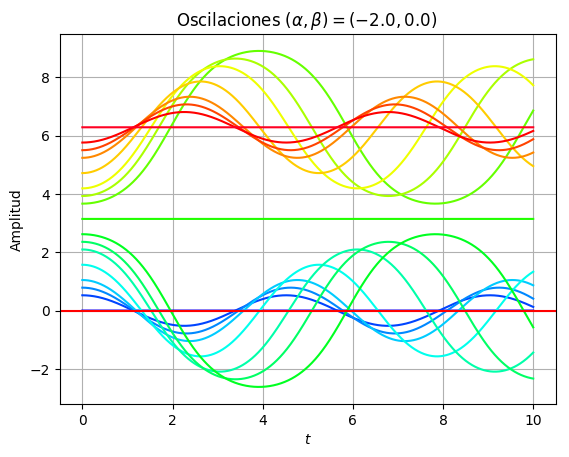

In [12]:
oscilaciones(-2.,0.)

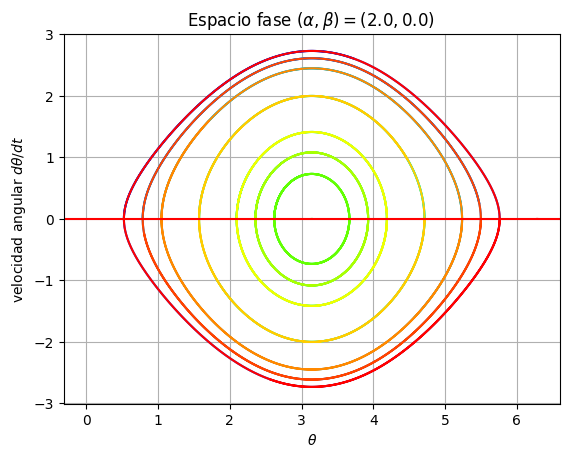

In [13]:
espacio_fase(2.,0.)

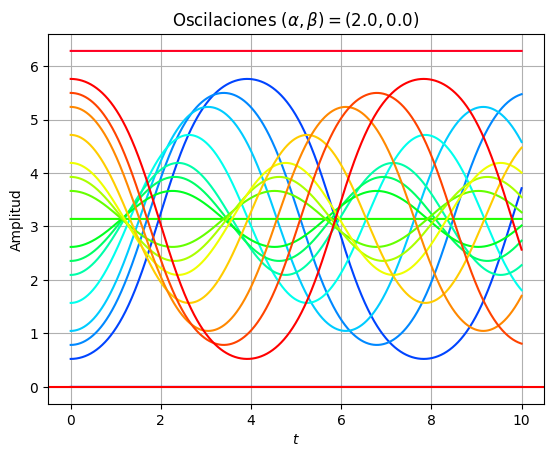

In [14]:
oscilaciones(2.,0.)

Manteniendo $β=0$ fija, variamos $α$ de $-2$ a $2$ 

<img src="https://i.imgur.com/1MfcpJI.gif" title="Angulos" align="left">

<img src="https://i.imgur.com/7iCb5UI.gif" title="Angulos" align="left">


### Espacio fase

Manteniendo $α=-2$ fija, variamos $β$ de $0$ a $10$ . Hay un cambio "brusco" entre 2.7 y 2.8, 2.9 y 3.0, 3.5 y 3.6. Comparar 3.6 con 3.9, 3.93 con 4.1

<img src="https://i.imgur.com/XEL1bVw.gif" title="Angulos" align="left">


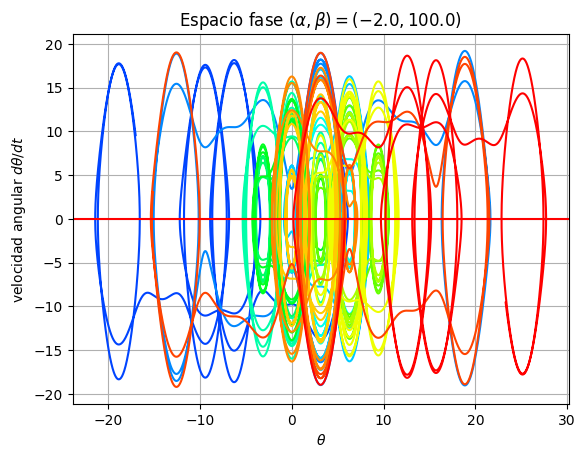

In [15]:
espacio_fase(-2.,100.)

Manteniendo $α=-2$ fija, variamos $β$ de $10$ a $100$.

<img src="https://i.imgur.com/9fMu14U.gif" title="Angulos" align="left">






Manteniendo $α=0.3$ fija, variamos $β$ de $0$ a $10$.

<img src="https://i.imgur.com/16oUA7j.gif" title="Angulos" align="left">

Manteniendo $α=0.3$ fija, variamos $β$ de $10$ a $100$.

<img src="https://i.imgur.com/Xeqr7aF.gif" title="Angulos" align="left">


Variamos $α$ y $β$ tal que $α=β$

<img src="https://i.imgur.com/nkdiqkU.gif" title="Angulos" align="left">

Manteniendo $β=1$ variamos $α$

<img src="https://i.imgur.com/bC9upRK.gif" title="Angulos" align="left">



### Oscilaciones

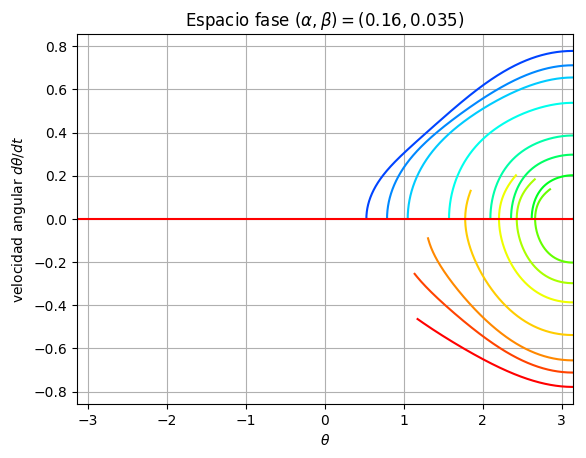

In [19]:
espacio_fase(0.16,0.035)

In [79]:
using PyCall
@pyimport matplotlib.animation as anim
using PyPlot

function showanim(filename)
    base64_video = base64encode(open(filename))
    display("text/html", """<video controls src="data:video/x-m4v;base64,$base64_video">""")
end

fig = figure(figsize=(6,6))# Para que se vea el eje inferior debe ser con valores mayores a 4
ax = axes()

x = [0:0.1:0.0;]

# i=0,1,...,frames-1
function animate(i)
    clf()
    plot(espacio_fase.(-2.,x+i/1.5))
end

function init()
    plot(x,espacio_fase.(-2.,x))
end

withfig(fig) do
    myanim = anim.FuncAnimation(fig, animate, frames=15, init_func=init, interval=25, blit=true)
    myanim[:save]("test10.mp4", bitrate=-1, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
end

showanim("test10.mp4")

LoadError: @pyimport: anim already defined

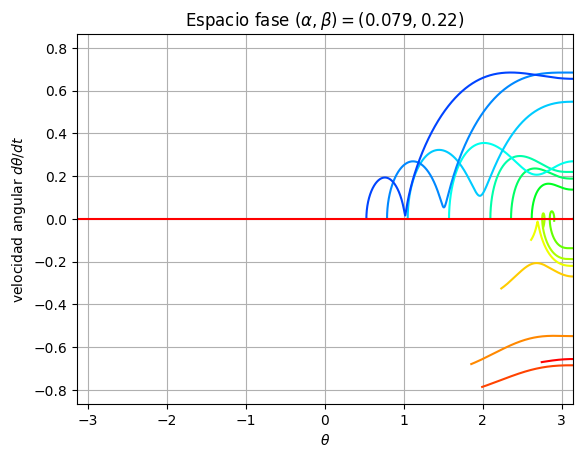

In [10]:
espacio_fase(0.079,0.22)

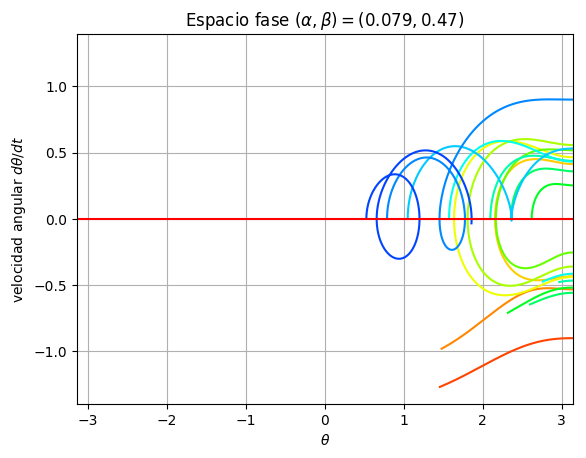

In [9]:
espacio_fase(0.079,0.47)

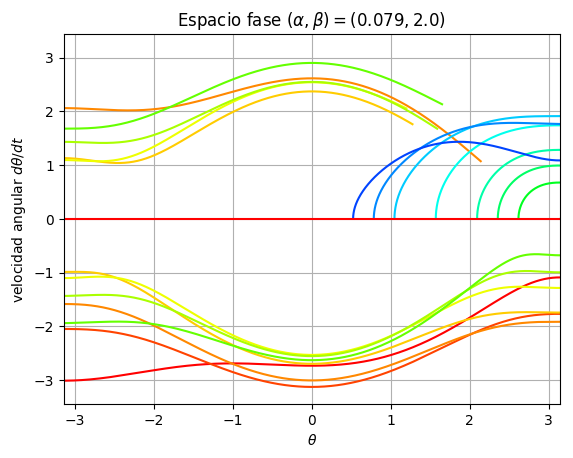

In [8]:
espacio_fase(0.079,2.)

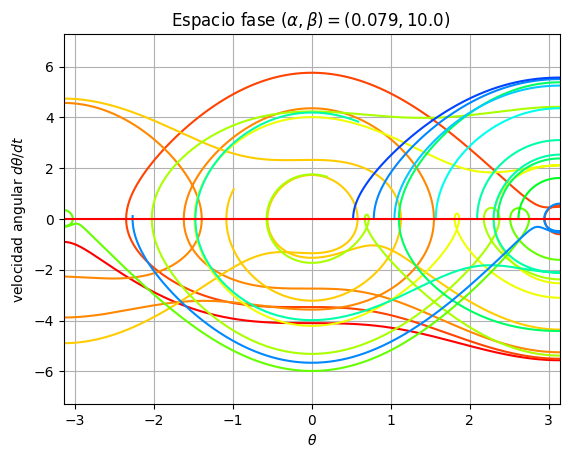

In [7]:
espacio_fase(0.079,10.)

----------------

Ecuación de movimiento: 

 \begin{equation} \ddot{θ}=\left[α+βcos(t)\right]sin(θ) \end{equation} 
        

In [1]:
g = 9.81; #Aceleración de la gravedad
l = 1; #Logitud del péndulo 

α=sqrt(g/l);

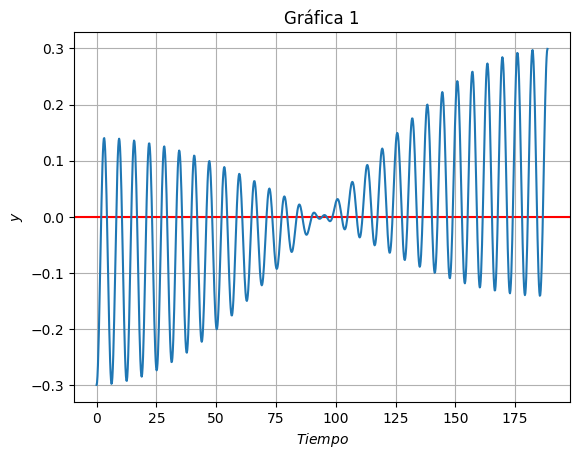

In [5]:
#Constantes
α = 0.079;
β = 0.22;

#Variables
t = linspace(0, 60*pi, 1000);
θ = linspace(-pi/2, pi/2, 1000);
#---------------------------------

y = []
x = []
for i=1:length(t)
    val_y = sin(θ[i])*(α+β*cos(t[i])) #Evaluamos en la función
    y = push!(y,val_y) #Agregamos el valor en el arreglo
end

#Gráfica

title("Gráfica 1")#Título de la gráfica
xlabel("\$Tiempo\$") #Etiqueta para el eje X
ylabel("\$y\$")#Etiqueta para el eje Y

axhline(0, color="red") 
grid() #malla

plot(t,y)
 
show()





In [72]:
using Plots
using PyCall

pyplot(size=(300,200))
p = plot([sin,cos], 0, π, lab=[:sin :cos])
scatter!(1, lab="")
anim = @animate for x in 0:0.1:π
    p[3] = [x,x], [sin(x),cos(x)]
end
gif(anim)

LoadError: PyError (:PyObject_Call) <class 'ValueError'>
ValueError('third arg must be a format string',)
  File "/home/solaris/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py", line 3317, in plot
    ret = ax.plot(*args, **kwargs)
  File "/home/solaris/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py", line 1898, in inner
    return func(ax, *args, **kwargs)
  File "/home/solaris/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py", line 1406, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/home/solaris/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py", line 407, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/home/solaris/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py", line 360, in _plot_args
    raise ValueError('third arg must be a format string')


# Referencias 

* http://fisica.eia.edu.co/wiki/index.php/Programación_en_Python:_El_Péndulo
* http://nbviewer.jupyter.org/url/sistemas.fciencias.unam.mx/~rich/herramientas/notebooks/Runge_Kutta.ipynb
* http://math2.org/math/graphs/unitcircle.gif
* https://en.wikipedia.org/wiki/Inverted_pendulum
* http://gifmaker.org 